In [ ]:
from common.utils import *
import os.path as osp
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Error: Invalid response: 500 Internal Server Error

In [2]:
def plot_weight_dist(model):
    to_be_plotted = []

    num_blocks = [3,4,6,3]
    for layer in range(1,5):
        for block in range(0,num_blocks[layer-1]):
            conv = model._modules['layer'+str(layer)][block]._modules['conv2'].weight.data.numpy()
            to_be_plotted.append(conv)
    
    plt.violinplot(to_be_plotted)

In [117]:
def plot_weight_hist(model):
    to_be_plotted = []
    
    fig, axs = plt.subplots(3, 3)

    conv = model._modules['layer3'][0]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[0,0].hist(conv,50,weights=weights)
    axs[0,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer3'][1]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[0,1].hist(conv,50,weights=weights)
    axs[0,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer3'][2]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[0,2].hist(conv,50,weights=weights)
    axs[0,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))
    
    conv = model._modules['layer3'][3]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[1,0].hist(conv,50,weights=weights)
    axs[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer3'][4]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[1,1].hist(conv,50,weights=weights)
    axs[1,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer3'][5]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[1,2].hist(conv,50,weights=weights)
    axs[1,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer4'][0]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[2,0].hist(conv,50,weights=weights)
    axs[2,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer4'][1]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[2,1].hist(conv,50,weights=weights)
    axs[2,1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    conv = model._modules['layer4'][2]._modules['conv2'].weight.data.numpy().flatten()
    weights = np.ones_like(conv)/float(len(conv))
    axs[2,2].hist(conv,50,weights=weights)
    axs[2,2].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [3]:
def plot_weight_hist(model):
    
    fig, axs = plt.subplots(4, 4,sharey=True, tight_layout=True)
    num_blocks = [3,4,6,3]
    i = 0
    j = 0
    for layer in range(1,5):
        
        for block in range(0,num_blocks[layer-1]):
            conv = model._modules['layer'+str(layer)][block]._modules['conv2'].weight.data.numpy().flatten()
            weights = np.ones_like(conv)/float(len(conv))
            axs[i,j].hist(conv,50,weights=weights)
            axs[i,j].yaxis.set_major_formatter(PercentFormatter(xmax=1))
            axs[i,j].set_title('L '+str(layer)+', B '+str(block))
            #print(i,j)
            if j == 3:
                j = -1
                i += 1
            j += 1
            
    plt.subplots_adjust(wspace=1,hspace=0.5)


In [17]:
def gene_filter_stats(model):
    
    num_blocks = [3,4,6,3]
    mean = []
    std = []
    for layer in range(1,5):
        
        for block in range(0,num_blocks[layer-1]):
            conv = model._modules['layer'+str(layer)][block]._modules['conv2'].weight.data.numpy()
            stacked_conv = np.reshape(conv,(-1,conv.shape[2],conv.shape[3]))
            mean_mat = np.mean(stacked_conv,axis=0)
            std_mat = np.std(stacked_conv,axis=0)
            
            mean.append(mean_mat)
            std.append(std_mat)
    return mean, std

In [26]:
style = 16
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
mean,std=gene_filter_stats(model)
mean

[array([[ 0.00073184, -0.00016442,  0.000326  ],
        [-0.00029058, -0.00080146,  0.00022765],
        [ 0.00059001, -0.0002549 ,  0.0004242 ]], dtype=float32),
 array([[ 2.9503679e-04, -1.4662243e-04,  1.8183482e-05],
        [ 4.2032614e-05, -9.0605184e-04,  6.8442707e-05],
        [ 4.0145183e-04, -2.0386557e-04,  4.4779328e-04]], dtype=float32),
 array([[-8.5054817e-06, -4.8493501e-04, -7.9824582e-05],
        [-5.2316528e-04, -1.4180377e-03, -4.0774094e-04],
        [ 9.3459967e-05, -1.1942408e-04,  6.7624467e-04]], dtype=float32),
 array([[-2.7925635e-04, -1.7810340e-05, -9.6676580e-05],
        [-2.9509500e-04, -1.8230095e-04, -3.9716170e-04],
        [-4.9697724e-04, -6.0403318e-04, -7.6186872e-04]], dtype=float32),
 array([[-0.00017958, -0.00032503, -0.00022698],
        [-0.00050836, -0.00077558, -0.00053556],
        [-0.00038036, -0.00028429, -0.00044324]], dtype=float32),
 array([[ 9.1462925e-06, -2.9532530e-04, -1.8488499e-04],
        [-3.2566921e-04, -8.9393702e-04, 

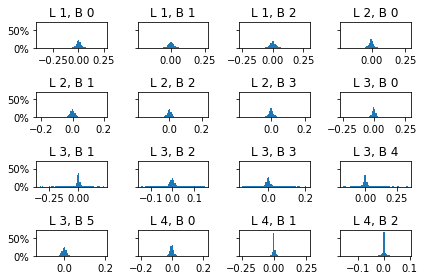

In [153]:
plot_weight_hist(model)

In [2]:

weights_name = {
            -1: '7Scenes_chess_mapnet_mapnet_learn_beta_learn_gamma/epoch_250.pth.tar',
            0:'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_baseline.pth.tar',
            4: 'AachenDayNight__mapnet_stylized_4_styles_seed0.pth.tar',
            8:'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_stylized_8_styles_seed0.pth.tar',
            16: 'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_stylized_16_styles_seed0.pth.tar'}       


In [7]:
style = -1
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
torch.save(model,'../NetDissect-Lite/restnet34_7scenes_chess.pth.tar')

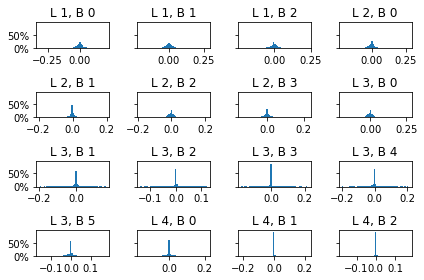

In [154]:
# model 0
style = -1
weights_dir = osp.join('scripts/logs',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

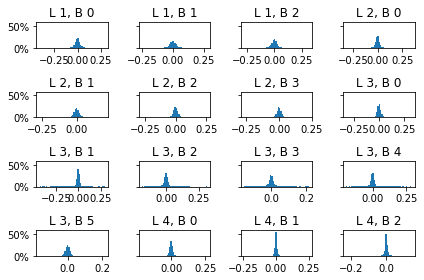

In [155]:
# model 0
style = 0
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

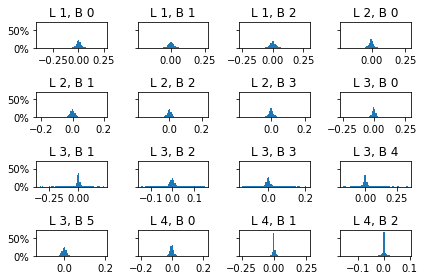

In [156]:
# model 0
style = 4
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

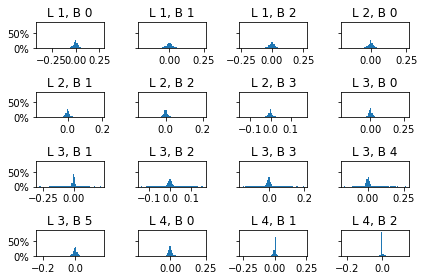

In [157]:
# model 0
style = 8
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

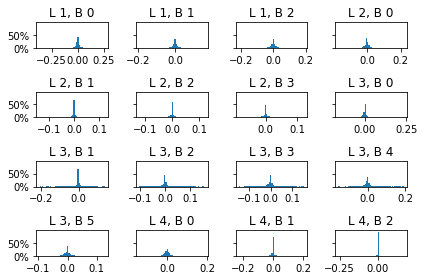

In [158]:
# model 0
style = 16
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

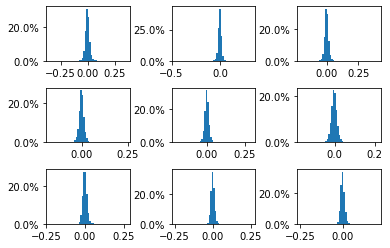

In [99]:
from torchvision import models
style = 16
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
model = models.resnet34(pretrained=True)
plot_weight_hist(model)

In [110]:
import torch
import torch.nn as nn
mat = torch.zeros(1,1,10,10)
conv = nn.Conv2d(1,1,3,3)

conv.weight.data = torch.zeros_like(conv.weight.data)
conv.bias.data = torch.zeros_like(conv.bias.data)
print(conv(mat))

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], grad_fn=<MkldnnConvolutionBackward>)


In [107]:
a = np.random.randn((5))
idx = np.argsort(a)[::-1]

In [108]:
idx = np.argsort(conv(mat).detach().numpy().flatten())[::-1]


In [109]:
idx

array([8, 7, 6, 5, 4, 3, 2, 1, 0])